# EE511 Project 6

### Question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import random
import math
import time
import scipy.stats

Mean of A:  2.976872418708574
Theoretical Mean: 3
Estimated Covariance of X, Y:  [-0.03121696]
Estimated Variance of A:  13.105438620349764
Theoretical Variance of A: 13


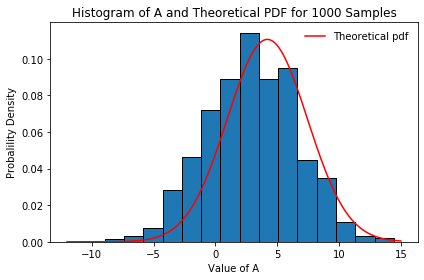

In [2]:
N = 1000 #no of samples
M1 = 1 # Mean of X
M2 = 2 # Mean of Y
V1 = 4 # Variance of X
V2 = 9 # Variance of Y

u1 = np.random.rand(N,1)
u2 = np.random.rand(N,1)


#  Generate X and Y that are N(0,1) random variables and independent
X = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
Y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

# Scale them to a particular mean and variance 
x = np.sqrt(V1)*X + M1; # x~ N(M1,V1)
y = np.sqrt(V2)*Y + M2; # y~ N(M2,V2)

A = x+y


theory_min = -15
theory_max = 15
theory_range = np.linspace(theory_min, theory_max, 1000)
theory_pdf = scipy.stats.norm.pdf(theory_range,3,math.sqrt(9+4))



#plt.hist(A, bins = 15, edgecolor = 'black', facecolor = 'orange')
#plt.plot(x_range, theory_pdf)
#plt.show()

#print(theory_pdf)

num_bins = 15
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(A, num_bins, edgecolor = 'black', density = True)

plt_range = np.linspace(-12, 15, 1000)

ax.plot(plt_range, theory_pdf, ms=8, label='Theoretical pdf', color = 'red')
ax.legend(loc='best', frameon=False)
plt.xlabel("Value of A")
plt.ylabel("Probalility Density")
plt.title("Histogram of A and Theoretical PDF for 1000 Samples")
fig.tight_layout()

print("Mean of A: ", str(A.mean()))
print("Theoretical Mean: 3")

mean_x = x.mean() 
mean_y = y.mean()

cov = sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)
print("Estimated Covariance of X, Y: ", str(cov))
print("Estimated Variance of A: ",str(np.var(A)) )
print("Theoretical Variance of A: 13")

Mean of A:  3.010556805141089
Theoretical Mean: 3
Estimated Covariance of X, Y:  -0.1470796926566637
Estimated Variance of A:  12.813747993133235
Theoretical Variance of A: 13


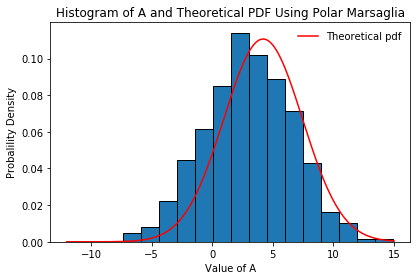

In [9]:
#start_mar = time.time()
M1 = 1 # Mean of X
M2 = 2 # Mean of Y
V1 = 4 # Variance of X
V2 = 9 # Variance of Y
j = 0 # the random number generated by the algorithm 
X1 = np.empty(1000)
Y1 = np.empty(1000)
# Generate X and Y that are N(0,1) random variables and indepedent
while j<=999:
    u1 = 2*np.random.rand()-1
    u2 = 2*np.random.rand()-1
    s = u1*u1 + u2*u2
    if s < 1:
        X1[j] = np.sqrt(-2*np.log(s)/s)*u1
        Y1[j] = np.sqrt(-2*np.log(s)/s)*u2
        j = j+1

# Scale them to a particular mean and variance 
x = np.sqrt(V1)*X1 + M1; # x~ N(M1,V1)
y = np.sqrt(V2)*Y1 + M2; # y~ N(M2,V2)
A_p = x + y
#end_mar = time.time()
#print(len(A_p))
#print(end_mar - start_mar)

num_bins = 15
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(A_p, num_bins, edgecolor = 'black', density = True)

plt_range = np.linspace(-12, 15, 1000)
theory_min = -15
theory_max = 15
theory_range = np.linspace(theory_min, theory_max, 1000)
theory_pdf = scipy.stats.norm.pdf(theory_range,3,math.sqrt(9+4))


ax.plot(plt_range, theory_pdf, ms=8, label='Theoretical pdf', color = 'red')
ax.legend(loc='best', frameon=False)
plt.xlabel("Value of A")
plt.ylabel("Probalility Density")
plt.title("Histogram of A and Theoretical PDF Using Polar Marsaglia")
fig.tight_layout()

print("Mean of A: ", str(A_p.mean()))
print("Theoretical Mean: 3")

mean_x = x.mean() 
mean_y = y.mean()
cov = sum((a - mean_x) * (b - mean_y) for (a,b) in zip(x,y)) / len(x)
print("Estimated Covariance of X, Y: ", str(cov))
print("Estimated Variance of A: ",str(np.var(A_p)) )
print("Theoretical Variance of A: 13")  

Text(0.5, 1.0, 'Histogram of Time to Generate Box-Muller Samples')

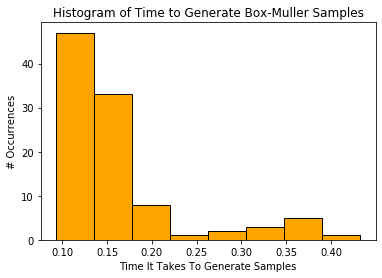

In [10]:
box_arr = []
for i in range(0,100):
    start_box = time.time()
    N = 1000000 #no of samples
    M1 = 1 # Mean of X
    M2 = 2 # Mean of Y
    V1 = 4 # Variance of X
    V2 = 9 # Variance of Y

    u1 = np.random.rand(N,1)
    u2 = np.random.rand(N,1)

    #  Generate X and Y that are N(0,1) random variables and independent
    X = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    Y = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)

    # Scale them to a particular mean and variance 
    x = np.sqrt(V1)*X + M1; # x~ N(M1,V1)
    y = np.sqrt(V2)*Y + M2; # y~ N(M2,V2)

    end_box = time.time()
    box_arr.append(end_box - start_box)
plt.hist(box_arr, bins = 8, edgecolor = 'black', facecolor = 'orange')
plt.xlabel("Time It Takes To Generate Samples")
plt.ylabel("# Occurrences")
plt.title("Histogram of Time to Generate Box-Muller Samples")

Text(0.5, 1.0, 'Histogram of Time to Generate Polar Marsaglia Samples')

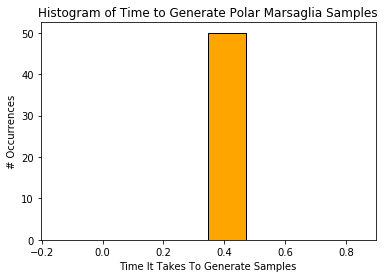

In [12]:
box_arr = []
for i in range(0,50):
    start_mar = time.time()
    M1 = 1 # Mean of X
    M2 = 2 # Mean of Y
    V1 = 4 # Variance of X
    V2 = 9 # Variance of Y
    i = 0 # the random number generated by the algorithm 

    # Generate X and Y that are N(0,1) random variables and indepedent
    while i<=999999:
        u1 = 2*np.random.rand()-1
        u2 = 2*np.random.rand()-1
        s = u1*u1 + u2*u2
        if s < 1:
            X[i] = np.sqrt(-2*np.log(s)/s)*u1
            Y[i] = np.sqrt(-2*np.log(s)/s)*u2
            i = i+1

    # Scale them to a particular mean and variance 
    x = np.sqrt(V1)*X + M1; # x~ N(M1,V1)
    y = np.sqrt(V2)*Y + M2; # y~ N(M2,V2)
    A_p = x + y
    end_mar = time.time()
    box_arr.append(end_box - start_box)
plt.hist(box_arr, bins = 8, edgecolor = 'black', facecolor = 'orange')
plt.xlabel("Time It Takes To Generate Samples")
plt.ylabel("# Occurrences")
plt.title("Histogram of Time to Generate Polar Marsaglia Samples")

#### Question 1 Analysis
- The first graph is a histogram of 1000 samples generated using the Box-Muller Method, and the theoretical pdf layed over the histogram. 
    - As seen in the data, the covariance between X and Y is close to zero, which makes sense since the two variables are independently generated and theoretically independent. 
    - This is a fairly precise method of generated values from a normal distribution, given that both the estimated mean and variance are within hundreths of the theoretical mean and variance. 
- The second graph is a histogram of 1000 samples generated using the Polar Marsaglia Method, and the theoretical pdf layed over the histogram. 
    - As seen in the data, the covariance between X and Y is close to zero, which makes sense since the two variables are independently generated and theoretically independent. 
    - This is also a fairly precise method of generated values from a normal distribution, given that both the estimated mean and variance are within hundreths of the theoretical mean and variance. 
    - However, the histogram for this method fits the theoretical pdf better than that of the Box-Muller Method.
- The third graph is a histogram of the time it takes to generate 1,000,000 Box-Muller samples for 100 trials. 
- The fourth graph is a histogram of the time it takes to generate 1,000,000 Polar Marsaglia samples for 50 trials. 
- Although the Polar Marsaglia method histogram matches the theoretical pdf in a more precise and accurate manner, the time needed to produce Box-Muller plots is on average much lower, resulting in the Box-Muller method being the more computationally efficient algorithm. 